# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
# exercise 1.1

housing = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-regression-P1-introduction-main/ds-regression-P1-introduction-main/data/housing.csv")
df = housing.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
# Multiple Linear Regression
X = df.loc[:, df.columns != 'PRICE']
X = sm.add_constant(X)
y = df['PRICE']
est = sm.OLS(y,X).fit()
summary = est.summary()

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_coefs = []
results_df.apply(lambda row: all_coefs.append(row['coef']), axis=1)
all_coefs.pop(0)

print("The R-squared for the regression model is 0.734.\n")
features = list(df.columns)
for i in range(len(features)-1):
    print(f"The coefficient for {features[i]} is: {all_coefs[i]}.")

sum_error = []
results_df.apply(lambda row: sum_error.append(row['std err']), axis=1)
print(f"\nThe sum of errors is: {round(sum(sum_error),3)}.")
summary

The R-squared for the regression model is 0.734.

The coefficient for CRIM is: -0.1214.
The coefficient for ZN is: 0.047.
The coefficient for INDUS is: 0.0135.
The coefficient for CHAS is: 2.84.
The coefficient for NOX is: -18.758.
The coefficient for RM is: 3.6581.
The coefficient for AGE is: 0.0036.
The coefficient for DIS is: -1.4908.
The coefficient for RAD is: 0.2894.
The coefficient for TAX is: -0.0127.
The coefficient for PTRATIO is: -0.9375.
The coefficient for LSTAT is: -0.552.

The sum of errors is: 10.655.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          2.23e-133
Time:                        13:29:25   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# dropping features with p values over 0.05.

df = df.drop(columns=['INDUS','AGE'])

In [5]:
X = df.drop(columns=['PRICE'])
X = sm.add_constant(X)
y = df['PRICE']
est = sm.OLS(y,X).fit()
summary = est.summary()

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_coefs = []
results_df.apply(lambda row: all_coefs.append(row['coef']), axis=1)
all_coefs.pop(0)

print("The R-squared for the regression model is 0.734.\n")
features = list(df.columns)
for i in range(len(features)-1):
    print(f"The coefficient for {features[i]} is: {all_coefs[i]}.")
    
sum_error = []
results_df.apply(lambda row: sum_error.append(row['std err']), axis=1)
print(f"\nThe sum of errors is: {round(sum(sum_error),3)}.")
    
summary

The R-squared for the regression model is 0.734.

The coefficient for CRIM is: -0.1217.
The coefficient for ZN is: 0.0462.
The coefficient for CHAS is: 2.8719.
The coefficient for NOX is: -18.2624.
The coefficient for RM is: 3.673.
The coefficient for DIS is: -1.516.
The coefficient for RAD is: 0.2839.
The coefficient for TAX is: -0.0123.
The coefficient for PTRATIO is: -0.931.
The coefficient for LSTAT is: -0.5465.

The sum of errors is: 10.219.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.73e-135
Time:                        13:29:26   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
CRIM          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
ZN             0.0462      0.014      3.378      0.001       0.019       0.073
CHAS           2.8719      0.863      3.329      0.001       1.177       4.567
NOX          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
RM             3.6730      0.409      8.978      0.000       2.869       4.477
DIS           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
RAD            0.2839      0.064      4.440      0.000       0.158       0.410
TAX           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
PTRATIO       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
LSTAT         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [6]:
#Making labels for features in summary
index_for_x = ['const']
features.remove('PRICE')
for i in range(len(features)):
    index_for_x.append(features[i])
for i in range(len(features)):
    index_for_x.append(features[i])

In [7]:
# exercise 1.2
X = np.squeeze(np.asarray(X))
X = np.concatenate([X, np.square(X[:,1:11])], axis=1)
new_X = pd.DataFrame(X,columns = index_for_x)
est = sm.OLS(y,new_X).fit()

print("This squared model minimizes BIC.")

est.summary()

This squared model minimizes BIC.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     122.4
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          2.13e-171
Time:                        13:29:26   Log-Likelihood:                -1396.1
No. Observations:                 506   AIC:                             2832.
Df Residuals:                     486   BIC:                             2917.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.4851     20.891      8.017      0.000     126.438     208.533
CRIM          -0.4210      0.083     -5.049      0.000      -0.585      -0.257
ZN            -0.0548      0.031     -1.757      0.080      -0.116       0.006
CHAS           1.3264      0.356      3.729      0.000       0.627       2.025
NOX          -18.5683     24.175     -0.768      0.443     -66.069      28.932
RM           -19.9333      2.770     -7.196      0.000     -25.376     -14.490
DIS           -2.8375      0.527     -5.383      0.000      -3.873      -1.802
RAD            0.5788      0.210      2.760      0.006       0.167       0.991
TAX           -0.0336      0.012     -2.874      0.004      -0.057      -0.011
PTRATIO       -5.3193      1.665     -3.195      0.001      -8.591      -2.048
LSTAT         -1.3531      0.120    -11.316      0.000      -1.588      -1.118
CRIM           0.0034      0.001      3.170      0.002       0.001       0.006
ZN             0.0007      0.000      2.078      0.038    3.88e-05       0.001
CHAS           1.3264      0.356      3.729      0.000       0.627       2.025
NOX           -3.3626     17.770     -0.189      0.850     -38.279      31.554
RM             1.7896      0.217      8.256      0.000       1.364       2.216
DIS            0.1594      0.044      3.659      0.000       0.074       0.245
RAD           -0.0103      0.008     -1.234      0.218      -0.027       0.006
TAX         2.744e-05   1.47e-05      1.869      0.062   -1.41e-06    5.63e-05
PTRATIO        0.1275      0.047      2.707      0.007       0.035       0.220
LSTAT          0.0234      0.003      7.032      0.000       0.017       0.030
==============================================================================
Omnibus:                      157.995   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2515.006
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      13.772   Cond. No.                     3.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
index_for_x = ['const']
for i in range(len(features)):
    index_for_x.append(features[i])
for i in range(len(features)):
    index_for_x.append(features[i])
for i in range(len(features)):
    index_for_x.append(features[i])    

In [9]:
X = np.concatenate([X, (X[:,1:11]**3)], axis=1)
new_X = pd.DataFrame(X,columns = index_for_x)
est = sm.OLS(y,new_X).fit()

print("This cubic model minimizes AIC and maximizes R-squared, and so is the better choice.")
est.summary()

This cubic model minimizes AIC and maximizes R-squared, and so is the better choice.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     89.55
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          2.37e-170
Time:                        13:29:26   Log-Likelihood:                -1376.3
No. Observations:                 506   AIC:                             2811.
Df Residuals:                     477   BIC:                             2933.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.0472     92.332      1.647      0.100     -29.380     333.475
CRIM          -0.6973      0.164     -4.239      0.000      -1.021      -0.374
ZN             0.0304      0.062      0.490      0.625      -0.092       0.153
CHAS           0.8941      0.232      3.850      0.000       0.438       1.350
NOX          349.2476    145.668      2.398      0.017      63.017     635.479
RM           -22.0442     15.901     -1.386      0.166     -53.289       9.201
DIS           -6.2571      1.344     -4.656      0.000      -8.898      -3.616
RAD            1.5561      0.667      2.332      0.020       0.245       2.867
TAX           -0.2060      0.064     -3.213      0.001      -0.332      -0.080
PTRATIO      -10.3934     14.926     -0.696      0.487     -39.722      18.935
LSTAT         -1.9478      0.286     -6.816      0.000      -2.509      -1.386
CRIM           0.0127      0.005      2.416      0.016       0.002       0.023
ZN            -0.0022      0.002     -1.097      0.273      -0.006       0.002
CHAS           0.8941      0.232      3.850      0.000       0.438       1.350
NOX         -602.1895    237.250     -2.538      0.011   -1068.375    -136.004
RM             2.1121      2.533      0.834      0.405      -2.865       7.090
DIS            0.8652      0.242      3.582      0.000       0.391       1.340
RAD           -0.1637      0.096     -1.705      0.089      -0.352       0.025
TAX            0.0005      0.000      2.953      0.003       0.000       0.001
PTRATIO        0.4336      0.869      0.499      0.618      -1.275       2.142
LSTAT          0.0635      0.017      3.665      0.000       0.029       0.097
CRIM       -7.705e-05   4.41e-05     -1.749      0.081      -0.000    9.52e-06
ZN          2.295e-05   1.58e-05      1.453      0.147   -8.08e-06     5.4e-05
CHAS           0.8941      0.232      3.850      0.000       0.438       1.350
NOX          312.9727    125.519      2.493      0.013      66.335     559.611
RM            -0.0163      0.132     -0.123      0.902      -0.276       0.244
DIS           -0.0405      0.013     -3.049      0.002      -0.067      -0.014
RAD            0.0049      0.003      1.649      0.100      -0.001       0.011
TAX        -3.527e-07   1.23e-07     -2.869      0.004   -5.94e-07   -1.11e-07
PTRATIO       -0.0060      0.017     -0.360      0.719      -0.039       0.027
LSTAT         -0.0008      0.000     -2.406      0.017      -0.001      -0.000
==============================================================================
Omnibus:                      134.522   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2567.061
Skew:                           0.621   Prob(JB):                         0.00
Kurtosis:                      13.964   Cond. No.                     1.34e+16
==

### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

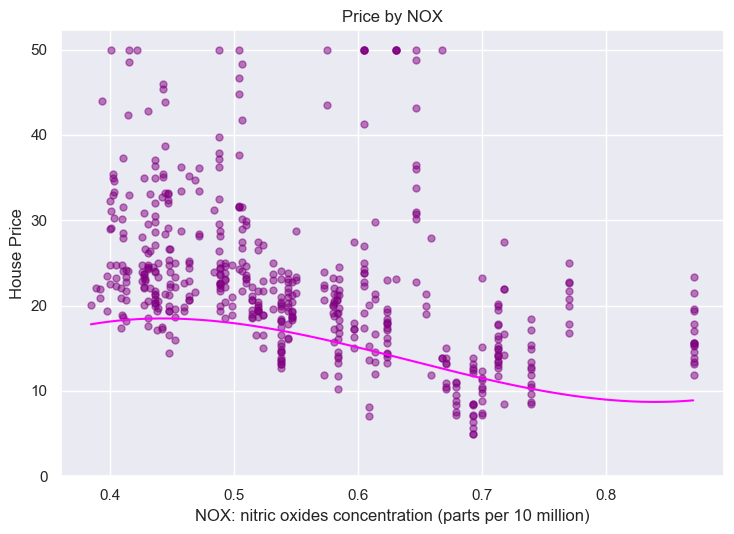

In [10]:
# exercise 1.3

crim_m = df['CRIM'].mean()
zn_m = df['ZN'].mean()
chas_m = df['CHAS'].mean()
nox_m = df['NOX'].mean()
rm_m = df['RM'].mean()
dis_m = df['DIS'].mean()
rad_m = df['RAD'].mean()
tax_m = df['TAX'].mean()
ptratio_m = df['PTRATIO'].mean()
lstat_m = df['LSTAT'].mean()

#input dataframe (all mean data appart from feature)
test_input = pd.DataFrame({'const':[1.0],'CRIM':crim_m,'ZN':zn_m,'CHAS':chas_m,'NOX':nox_m,'RM':rm_m,'DIS':dis_m,'RAD':rad_m,'TAX':tax_m,'PTRATIO':
                          ptratio_m,'LSTAT':lstat_m})
input_list = []
for i in range(1000):
    input_list.append(test_input)
input_df = pd.concat(input_list).reset_index(drop=True)
min_feature = df['NOX'].min()
max_feature = df['NOX'].max()
ticks = (max_feature-min_feature)/1000
n=min_feature
for i in range(len(input_df['NOX'])):
    input_df['NOX'].iloc[i] = n
    n += ticks
        
features = list(df.columns)
for i in range(len(features)):
    if features[i]=='NOX':
        index = i+1

#Scatter data
X = df.loc[:, df.columns != 'PRICE']
X = sm.add_constant(X)
y = df['PRICE']
X = np.squeeze(np.asarray(X))
y = np.squeeze(np.asarray(y))
X = np.concatenate([X, np.square(X[:,1:]),(X[:,1:12]**3)],axis=1)
est = sm.OLS(y,X).fit()

Xfit = input_df.loc[:,input_df.columns != 'PRICE']
Xfit = sm.add_constant(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
Xfit = np.concatenate([Xfit, np.square(Xfit[:,1:]),(Xfit[:,1:12]**3)],axis=1)
yfit = est.predict(Xfit)

fig, ax = plt.subplots(figsize=(7.5,5.5))
ax.scatter(X[:,index],y,s=25,color='purple',alpha=0.5)
ax.set_title('Price by NOX')
plt.xlabel('NOX: nitric oxides concentration (parts per 10 million)')
plt.ylabel('House Price')
ax.set_ylim(0)
ax.plot(Xfit[:,index],yfit,color='magenta')
fig.tight_layout()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [11]:
# exercise 2

def reg_plot_on_ax(feature, ax):

    
    input_list = []
    for i in range(1000):
        input_list.append(test_input)
    input_df = pd.concat(input_list).reset_index(drop=True)
    min_feature = df[feature].min()
    max_feature = df[feature].max()
    ticks = (max_feature-min_feature)/1000
    n=min_feature
    for i in range(len(input_df[feature])):
        input_df[feature].iloc[i] = n
        n += ticks
        
    features = list(df.columns)
    for i in range(len(features)):
        if features[i]==feature:
            index = i+1
    
    X = df.loc[:, df.columns != 'PRICE']
    X = sm.add_constant(X)
    y = df['PRICE']
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    X = np.concatenate([X, np.square(X[:,1:]),(X[:,1:12]**3)],axis=1)
    est = sm.OLS(y,X).fit()
    
    Xfit = input_df.loc[:,input_df.columns != 'PRICE']
    Xfit = sm.add_constant(Xfit)
    Xfit = np.squeeze(np.asarray(Xfit))
    Xfit = np.concatenate([Xfit, np.square(Xfit[:,1:]),(Xfit[:,1:12]**3)],axis=1)
    yfit = est.predict(Xfit)
    
    # axes title dictionary
    axes_titles = {'CRIM':'per capita crime rate by town','NOX':'nitric oxides concentration (parts per 10 million)',
                   'RM':'average number of rooms per dwelling','LSTAT':'percent lower status of the population'}
    
    ax.scatter(X[:,index],y,s=25,color='purple',alpha=0.5)
    ax.set_title(f"Price by {feature}")
    ax.set_ylim(0)
    ax.set_xlabel(f"{feature}: {axes_titles[feature]}")
    ax.set_ylabel('House Price')
    ax.plot(Xfit[:,index],yfit,color='magenta')
    fig.show()

C:\Users\Simona\AppData\Local\Temp\ipykernel_16536\3643185840.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Simona\AppData\Local\Temp\ipykernel_16536\3643185840.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Simona\AppData\Local\Temp\ipykernel_16536\3643185840.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Simona\AppData\Local\Temp\ipykernel_16536\3643185840.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


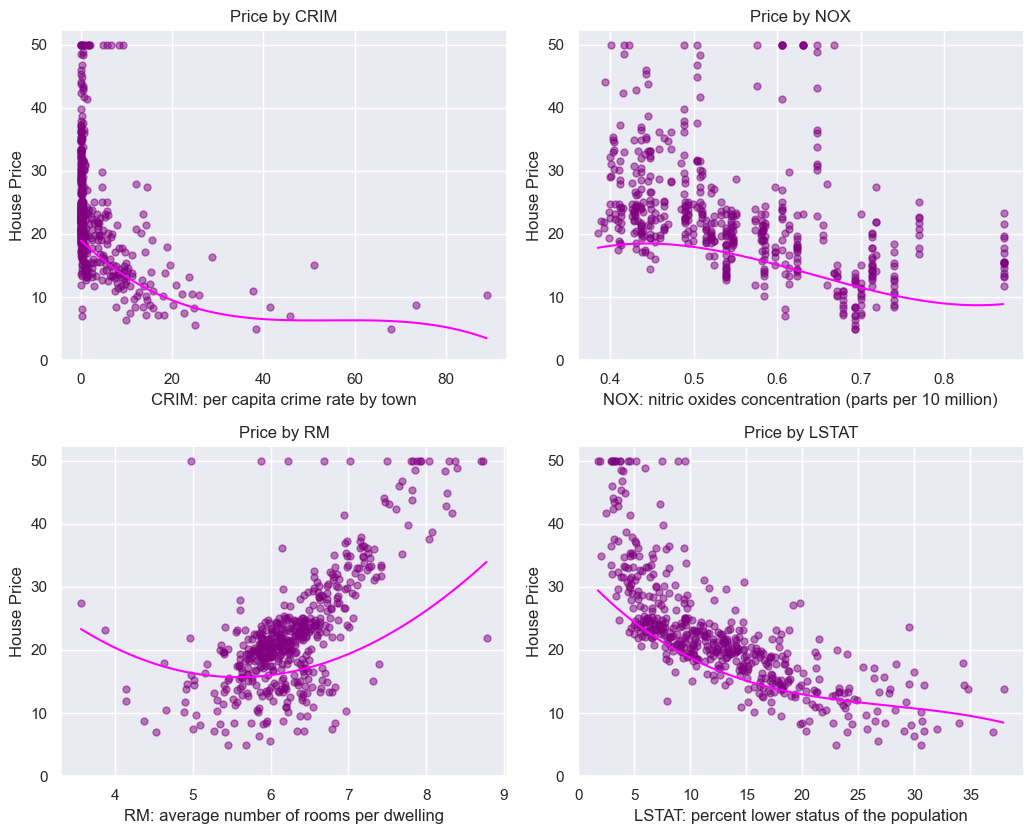

In [12]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10.5,8.5))
reg_plot_on_ax('CRIM',ax1)
reg_plot_on_ax('NOX',ax2)
reg_plot_on_ax('RM',ax3)
reg_plot_on_ax('LSTAT',ax4)
fig.tight_layout()